<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 1.C - Grafos </h2>
</center>
</p>
</div>


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>0 - Detección de ciclos</p></h2>
  
  <p>
  En este ejercicio deberéis implementar un algoritmo capaz de detectar si un grafo cualquiera contiene ciclos.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo que utilizaremos para buscar ciclos.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _'TF'_ __: Booleano indicando si el grafo de entrada contiene algún ciclo.</li>
<ul>

</p>

</div>

In [123]:
import networkx as nx

def cycles(G):
    
    discovered= set()
    S=list()
    S.append(0)
    
    G.node[0]['parents']=[]
    
    while len(S)!=0:
        actual_node=S.pop()
        
        if actual_node not in discovered:
            discovered.add(actual_node)
            for neighbor_node in list(G.adj[actual_node]):
                if neighbor_node in G.node[actual_node]['parents'] and neighbor_node!=G.node[actual_node]['parents'][len(G.node[actual_node]['parents'])-1]:
                    return True
                
                S.append(neighbor_node)                
                if [x for x in G.node[neighbor_node] if x=='parents']!=['parents']:
                    G.node[neighbor_node]['parents']=G.node[actual_node]['parents'].copy()
                G.node[neighbor_node]['parents'].append(actual_node)
                
    return False

In [124]:
%matplotlib inline
from utils import draw
G = nx.generators.barabasi_albert_graph(100, 2)
cycles(G)

0 49


True

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1 - Circuito Euleriano</p></h2>
  <p>
  Se define como circuito euleriano aquel que pasa por todas las aristas de un grafo una única vez y que acaba en el mismo lugar en el que empieza. El problema de los caminos eulerianos fué la base de toda la teoría de grafos y fué postulado por Lehonard Euler en el famoso problema de __los siete puentes de Königsberg__. En este problema Euler se preguntaba si podía acabar en el mismo sitio tras cruzar todos los puentes una sola vez.
  </p>
  <img src="img/konigsberg.jpg"></img>
  <p>
  En este ejercicio se os propone implementar un algoritmo que, dado un grafo _G_ encuentre un camino euleriano.
  </p>

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Objeto de tipo grafo sobre el cual queremos encontrar el circuito Euleriano.</li>
</ul>
<br>
<h3>OUTPUT</h3>
<ul>
<li>__ _nodelist_ __: Una lista de nodos ordenados que formarían el circuito.</li>
<ul>

</p>

</div>

In [157]:
def cycle(G, v, discovered, path, i):
    S_v=list()
    S_v.append(v)
    
    count=0
    
    while len(S_v)!=0:
        actual_node=S_v.pop()
        path.insert(i+count, actual_node)
        count+=1
        
        #Check that the vertex have even degree,
        #because that all of them have it it's a
        #necessary and sufucient condition to ensure
        #that the graph has an Eureler cycle
        if G.degree[actual_node]%2==1:
            return 1
        
        if actual_node not in discovered:
            discovered.add(actual_node)
            
            for neighbor_node in list(G.adj[actual_node]):
                if neighbor_node == v:
                    if v!=G.node[actual_node]['parent']:
                        return 0
                    
                if neighbor_node not in discovered:
                    S_v.append(neighbor_node)
                    G.node[neighbor_node]['parent']=actual_node
    
    return 2

def euler(G):
    discovered=set()
    path=[]
    
    ctrl=cycle(G,0,discovered, path, 0)
    if ctrl!=0:
        print(0)
        return 'Error'
    
    while len(discovered)!=len(list(G.nodes)):
        for node in path:
            for new_node in list(G.adj[node]):
                if new_node not in discovered:
                    ctrl=cycle(G,new_node,discovered, path, path.index(node)+1)
                    if ctrl!=0:
                        print(node)
                        return 'Error'
    
    return path
                    
                    
    
    

[]
[0, 3, 1, 2]


/home/m315/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


[0, 3, 1, 2]

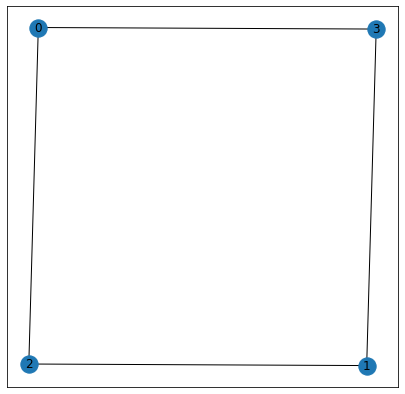

In [168]:
%matplotlib inline
from utils import draw
G = nx.generators.barabasi_albert_graph(4, 2)
draw(G)
euler(G)

<div class="alert alert-warning">
<h1>Pregunta</h1>
<p><strong>
¿Qué condiciones se deben de cumplir para que un grafo cualquiera contenga un camino euleriano? Demuéstralo.
</strong></p>
</div>

Un grafo no dirigido $G$ tiene un camino Euclidiano si i solo si contiene exactamente zero o dos nodos con grado impar, i todos los nodos con grado no nulo percenecen a la misma componente conexa.

$\textit{Demostracion:}$
    $\Rightarrow ]$asdf

<div class="alert alert-warning">
<h1>Extra</h1>
<p><strong>
Además de circuitos Eulerianos, definimos caminos Eulerianos aquellos que recorren todas las aristas de un grafo sin repetirlas, pero no termina en el mismo nodo que empieza. Modifica el algoritmo anterior para que sea capaz de detectar si el grafo contiene un ciclo o un camino Euleriano, y devuelva la lista de nodos ordenados que componen dicho ciclo o camino. Tened en cuenta que son casos excluyentes.
</strong></p>
</div>